In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load The Data
from sklearn.datasets import load_diabetes

In [3]:
data = pd.read_csv("height-weight.csv")

In [4]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


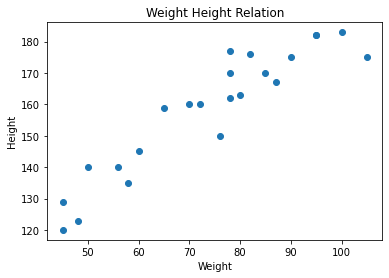

In [5]:
# EDA
plt.scatter(data["Weight"],data["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight Height Relation")
plt.show()

### **Problem Statement : I want to predict Height based on Weight**

In [6]:
X = pd.DataFrame(data["Weight"])
y = pd.DataFrame(data["Height"])

* 1. Read The Data 
* 2. EDA 
* 3. Data Prepareation 
* 4. X and Y 
* 5. Train Test Split Scaling (Option) :-> Standardzation
* 6. Model Traing 
* 7. Model Evaluation 

In [7]:
# Split the Data 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [8]:
print(f"X Train : {X_train.shape[0]} \ny Train : {y_train.shape[0]} \nX Test : {X_test.shape[0]} \ny Test : {y_test.shape[0]}")

X Train : 17 
y Train : 17 
X Test : 6 
y Test : 6


### **fit_trasform() and tranform() method**
#### In standardization we use z score formula that is (x-mean/stadard deviation)
#### When we transform the train data for training the model we calculate mean which calculed based on only train data if we calculated mean by using whole data means traing and test data the data leakage problem will happen

#### There for we used fit_transform() method only taining data set and we use only transform method on the testing data set.

In [9]:
# scaling(Optional) -> Standardization >> fit_transform on train data and transform on test data 
# If you use fit on test data,(that is wrong) you are doing data leakage, avoid it.
# Most of the Machine Leaning Model Standard Scaler is used as it deals with normal distribution

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
scaler

StandardScaler()

In [12]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [13]:
# Scaling should be done always after train test split
# Target variable should not be scaled 
# avoid scaling categorical Features 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

#### **Why Scaling is Optional?**
*It Doen't affect the distribution*


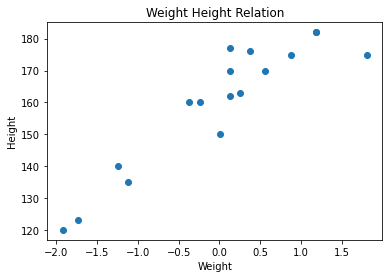

In [15]:
# EDA
plt.scatter(X_train,y_train)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight Height Relation")
plt.show()

In [16]:
# Model Training 
from sklearn.linear_model import LinearRegression

# Linear Regression Parameters :
# 1. fit_intercept >> The best fit line will have intercept, by default it is true 
# 2. copy_X >> copy the original X_train and then build the model, it will not modify the original data. 
# 3. n_jobs >> means using all processor 
# 4. positive >>  When set to True, force the coefficient to be positive

# fit :-> train the model 
# predict :-> test the model 


# After Building the model, you have attributes of the model 
# coef_
# intercept



In [17]:
regressor = LinearRegression()
regressor

LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print("The slope or coeff of model is : ",regressor.coef_)
print("The intercept of the model is : ",regressor.intercept_)
print(f"Equeation : Ypredication = {regressor.intercept_} + {regressor.coef_}X")

The slope or coeff of model is :  [[17.7307072]]
The intercept of the model is :  [160.]
Equeation : Ypredication = [160.] + [[17.7307072]]X


In [20]:
# Predication on train data
# interpretation of coef :-> One unit increase in weight, on an average the height increase by 17.73 units 
# predicated height(y) on X_train= 160 + 17.73*(X_train)
# predicated height(y) on X_train= 160 + 17.73*(X_test)

In [21]:
regressor.predict(X_train)

array([[166.65863288],
       [153.47066096],
       [129.29271243],
       [160.06464692],
       [164.46063756],
       [175.45061417],
       [140.28268904],
       [169.95562586],
       [125.99571945],
       [162.26264224],
       [155.66865628],
       [138.08469371],
       [162.26264224],
       [180.94560247],
       [191.93557907],
       [180.94560247],
       [162.26264224]])

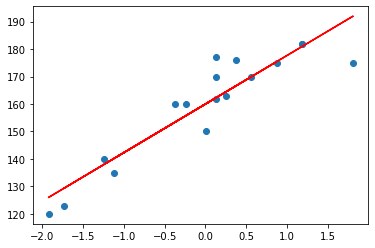

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color="red")
plt.show()

In [24]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([[125.99571945],
       [147.97567266],
       [142.48068436],
       [186.44059077],
       [172.15362118],
       [131.49070775]])

In [25]:
y_pred_test,y_test

(array([[125.99571945],
        [147.97567266],
        [142.48068436],
        [186.44059077],
        [172.15362118],
        [131.49070775]]),
     Height
 20     129
 17     159
 3      145
 13     183
 19     167
 16     140)

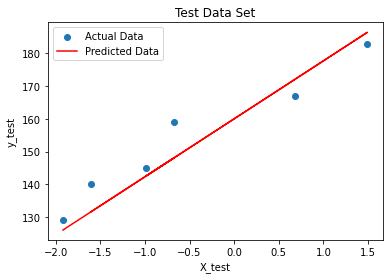

In [30]:
plt.scatter(X_test,y_test,label="Actual Data")
plt.plot(X_test,regressor.predict(X_test),color="r",label="Predicted Data")
plt.title("Test Data Set")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.legend()
plt.show()

### **Performance Metrices**

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [33]:
mean_absolute_error(y_test,y_pred_test)

5.608571289304824

In [32]:
mean_squared_error(y_test,y_pred_test)

41.28566283045539

In [36]:
rsq = r2_score(y_test,y_pred_test)
# r2 score = 1-(SSR/SST)
print(f"r2 : {rsq}")

r2 : 0.872103617425661


In [38]:
# adjusted rsquare 
# R2 = [(1-rsquare)*n-1/(n-k-1)]
# Where 
#       n is number of observation 
#       k is number of predictor variable

# In this k is X_test.shape[0]
adj_r2 = [(1-rsq)*len(y_test)-1/(len(y_test)-X_test.shape[1]-1)]
print(f"Adjusted R2 is : {adj_r2}")

Adjusted R2 is : [0.517378295446034]


### **Assumption**
#### *X and Y should have linear relationship*
#### *Observation should have no relation*
#### *Error should have constant variation* 
#### *Error should be normally distributed*
#### *Features among themself should be least related*

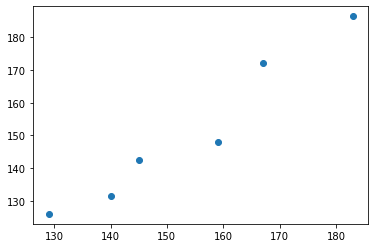

In [42]:
plt.scatter(y_test,y_pred_test)
plt.show()
# to Check if y_test and its predication aligns   

In [51]:
# Error should have constant variation
# Error should be normally distributed

error = y_test-y_pred_test
print(f"Error :\n{error}")

Error :
       Height
20   3.004281
17  11.024327
3    2.519316
13  -3.440591
19  -5.153621
16   8.509292


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

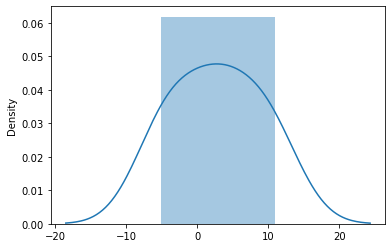

In [53]:
# Here Our Error Should be normal distributed becouse it doesn't happed that something is not correct.
sns.distplot(error)
# Approximatelyt a noramal distribution

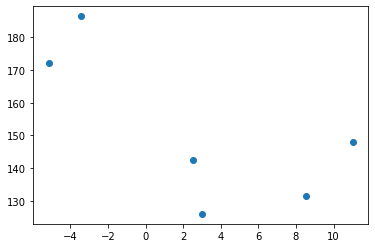

In [54]:
# To check constand variance 
# If below graph contain pattern that means ours data does not having linear relationship 
# We need doing feature engineering for fixing this error
plt.scatter(error,y_pred_test)